# Pymaceuticals Inc.
---

### Analysis

- After looking at all the data it appears that Capomulin was able to keep tumor growth down the best and also worked as effectively in both male and female test rats.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
import numpy as np

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB


In [4]:
study_results.Timepoint.value_counts()

0     250
5     238
10    223
15    207
20    195
25    183
30    171
35    154
40    142
45    130
Name: Timepoint, dtype: int64

In [5]:
# Combine the data into a single DataFrame
df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice.
len(mouse_metadata)

249

In [7]:
df["Mouse ID"].nunique()

249

In [8]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

df.groupby(["Mouse ID", "Timepoint"]).size().sort_values(ascending=False).head(20)

Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
a203      0            1
q633      0            1
q610      20           1
          25           1
          30           1
          35           1
q633      15           1
          5            1
          10           1
q610      10           1
q633      20           1
          25           1
q610      15           1
q597      45           1
q610      5            1
dtype: int64

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
mask = df["Mouse ID"] == "g989"
df.loc[mask]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_backup = df.copy()

df = df.loc[df["Mouse ID"] != "g989"].reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 117.6+ KB


In [11]:
# Checking the number of mice in the clean DataFrame.
df["Mouse ID"].nunique()

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

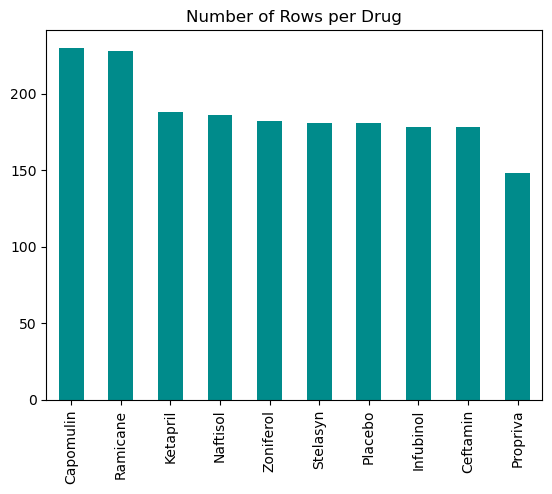

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
data = df["Drug Regimen"].value_counts()

data.plot(kind="bar", title="Number of Rows per Drug", color="darkcyan")
plt.show()

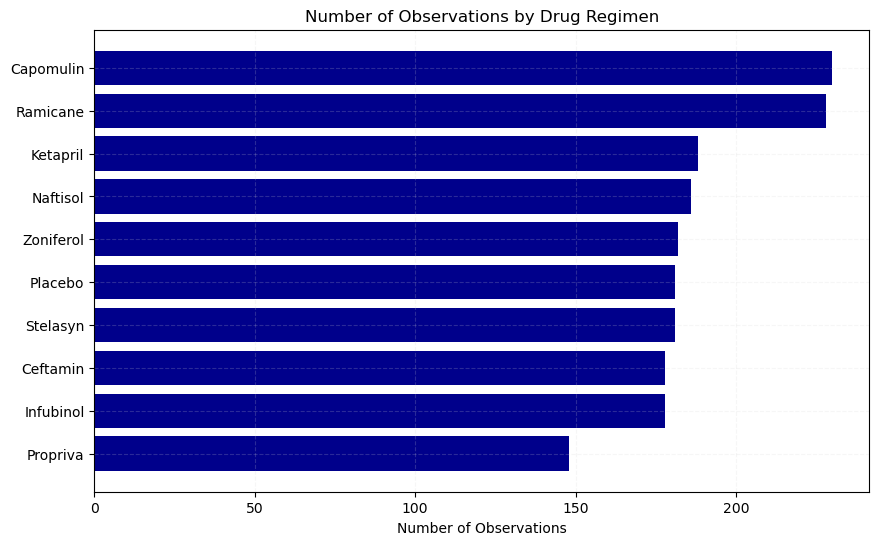

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

data = data.sort_values().reset_index()
data.columns = ["Drug Regimen", "Number of Rows"]


plt.figure(figsize=(10,6))
plt.barh(data["Drug Regimen"], data["Number of Rows"], color="darkblue")
plt.xlabel("Number of Observations")
plt.title("Number of Observations by Drug Regimen")

plt.grid(axis="both", color="lightgrey", alpha=0.2, linestyle="--")

plt.show()

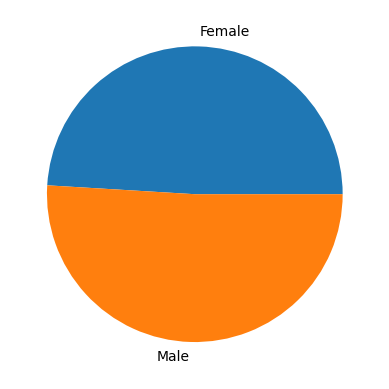

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

df.groupby("Sex").size().plot(kind="pie")
plt.show()

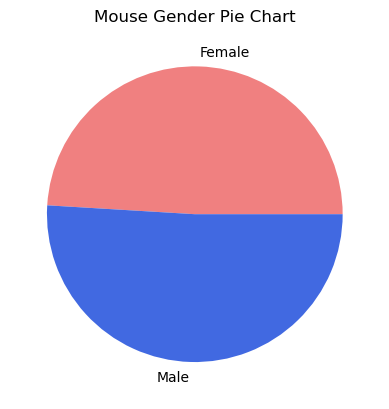

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
c = ["lightcoral", "royalblue"]


values = df.groupby("Sex").size().values
labels = ["Female", "Male"]
plt.pie(values, labels=labels, colors = c)
plt.title("Mouse Gender Pie Chart")

plt.show()

In [18]:
df.groupby("Sex").size()

Sex
Female    922
Male      958
dtype: int64

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [20]:
max_time = df.groupby("Mouse ID")["Timepoint"].max().reset_index()

last_df = pd.merge(max_time, df, on=["Mouse ID", "Timepoint"], how="inner")
last_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [21]:
df2 = last_df.loc[last_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])].reset_index(drop=True)
df2

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [22]:
import seaborn as sns

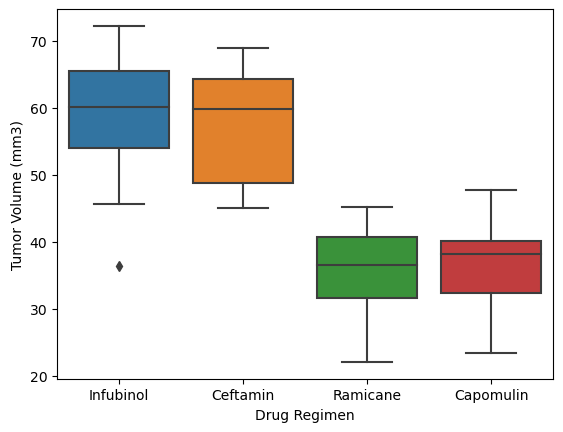

In [23]:
sns.boxplot(data=df2, x="Drug Regimen", y="Tumor Volume (mm3)")
plt.show()

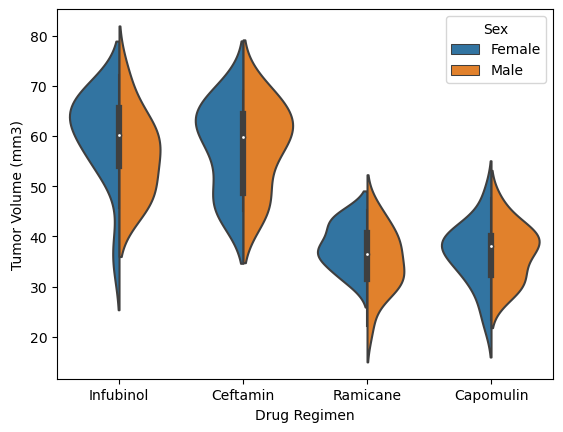

In [24]:
sns.violinplot(data=df2, x="Drug Regimen", y="Tumor Volume (mm3)",hue="Sex", split=True)
plt.show()

In [25]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = last_df.loc[last_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


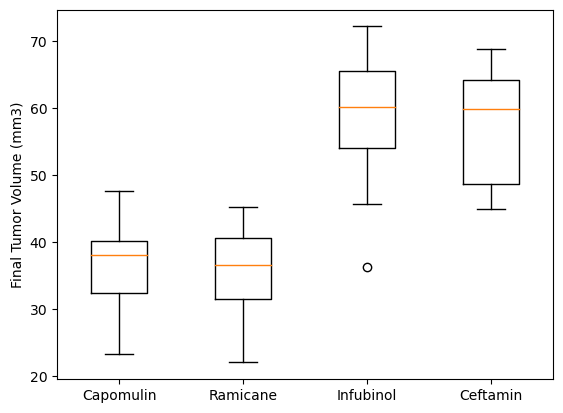

In [26]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_list, labels = treatment_list)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

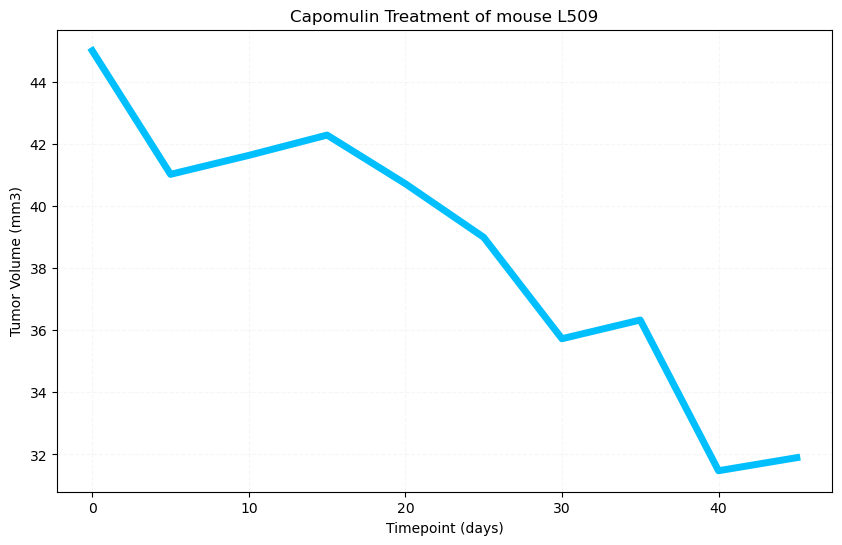

In [27]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
df_sub = df.loc[df["Mouse ID"] == "y793"] 

plt.figure(figsize=(10,6))
plt.plot(df_sub.Timepoint, df_sub["Tumor Volume (mm3)"], color="deepskyblue", linewidth=5)
plt.title("Capomulin Treatment of mouse L509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(axis="both", color="lightgrey", alpha=0.2, linestyle="--")
plt.show()

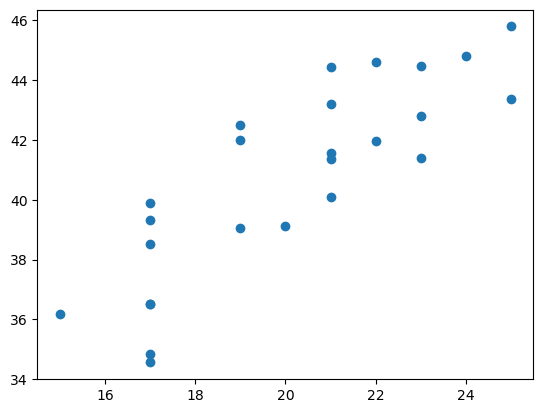

In [28]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
data = df.loc[df["Drug Regimen"] == "Capomulin"].groupby("Mouse ID").agg({"Weight (g)": "mean", "Tumor Volume (mm3)": "mean"}).reset_index()
data.columns = ["Mouse ID", "Average Weight", "Average Tumor Size"]

plt.scatter(data["Average Weight"], data["Average Tumor Size"])
plt.show()

## Correlation and Regression

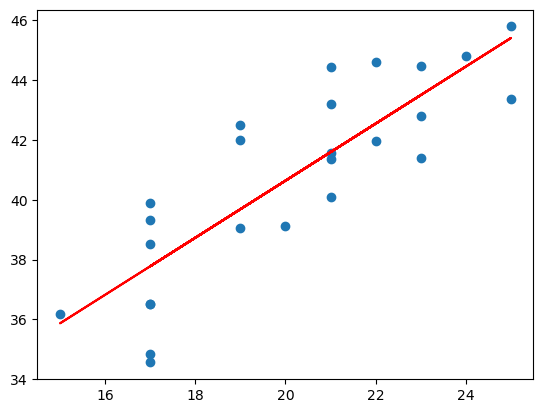

In [29]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
data = df.loc[df["Drug Regimen"] == "Capomulin"].groupby("Mouse ID").agg({"Weight (g)": "mean", "Tumor Volume (mm3)": "mean"}).reset_index()
data.columns = ["Mouse ID", "Average Weight", "Average Tumor Size"]

# Fit a linear regression line to the data
slope, intercept = np.polyfit(data["Average Weight"], data["Average Tumor Size"], 1)
line = slope * data["Average Weight"] + intercept

plt.scatter(data["Average Weight"], data["Average Tumor Size"])

plt.plot(data["Average Weight"], line, color='red')

plt.show()